In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-prediction-dataset/customer_churn_dataset.csv
/kaggle/input/customer-churn-prediction-dataset/customer_churn_dataset/train.csv
/kaggle/input/customer-churn-prediction-dataset/customer_churn_dataset/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/customer-churn-prediction-dataset/customer_churn_dataset.csv')

## **DATA READING**

In [3]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [4]:
df.tail()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
19995,19996,36,69.51,2502.36,Two year,Cash,DSL,No,Yes,0,Yes
19996,19997,10,59.88,598.80,Month-to-month,UPI,Fiber,Yes,No,1,No
19997,19998,6,42.96,257.76,Month-to-month,Credit,Fiber,No,No,2,No
19998,19999,7,102.85,719.95,Month-to-month,Debit,DSL,Yes,No,2,No
19999,20000,31,44.84,1390.04,Two year,Credit,Fiber,Yes,No,1,Yes


In [5]:
df.shape

(20000, 11)

In [6]:
df.columns.tolist()

['customer_id',
 'tenure',
 'monthly_charges',
 'total_charges',
 'contract',
 'payment_method',
 'internet_service',
 'tech_support',
 'online_security',
 'support_calls',
 'churn']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [8]:
df.isna().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [9]:
df.describe().round(2)

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.00,20000.00,20000.00,20000.00,20000.00
mean,10000.50,36.47,70.01,2543.98,1.51
std,5773.65,20.77,28.89,1882.95,1.24
min,1.00,1.00,20.00,20.23,0.00
25%,5000.75,18.00,45.21,1045.84,1.00
50%,10000.50,36.00,70.09,2096.50,1.00
75%,15000.25,54.00,95.07,3690.34,2.00
max,20000.00,72.00,120.00,8629.92,8.00


## **DATA CLEANING**

*Data is clean and and all columns contain appropiate data types. Subsequently, feature engineering can take place.*

## **FEATURE ENGINEERING**

*Support Call Density captures customer friction and is a powerful indicator of dissatisfaction. It is calculated by **(support_calls / tenure + 1)** which prevents "division by zero" errors for new customers with 0 months of tenure.*

In [10]:
df['support_call_density'] = df['support_calls'] / (df['tenure'] + 1) 

In [11]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,support_call_density
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No,0.018868
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No,0.125000
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No,0.000000
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No,0.000000
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes,0.181818


## **FEATURE ENCODING**

*In order to create a more accurate prediction model, incorporate as many variables as possible by converting **categorical -> numerical** types.*

*This conversion involves the **Label Encoding** of categorical variables.* 

*Adding more features provides the opportunity for the model to detect non-linear relationships, especially **qualitative and behavioural patterns** that standard numerical data cannot describe.*


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df_encoded = df.copy()

categorical_vars = df_encoded.select_dtypes(include="object").columns

le = LabelEncoder()

for col in categorical_vars:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# To see the mapping:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'No': 0, 'Yes': 1}


In [14]:
df_encoded.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,support_call_density
0,1,52,54.20,2818.40,0,1,0,0,1,1,0,0.018868
1,2,15,35.28,529.20,0,2,0,0,0,2,0,0.125000
2,3,72,78.24,5633.28,0,2,0,0,0,0,0,0.000000
3,4,61,80.24,4894.64,1,0,1,1,1,0,0,0.000000
4,5,21,39.38,826.98,0,3,1,0,0,4,1,0.181818


## **TRAIN - TEST SPLIT**

*Performing this step is **mandatory** in order to develop a simulation assesing how a model will handle data it has never seen before.*

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# 1. Separate features (X) and target (y)
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# 2. Split into training (80%) and testing (20%) sets
# random_state ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 16000
Testing set size: 4000


## **PREDICTIVE MODEL**

### **XGBoost** 

*One of the best in class model types for numerical tabular data. It is great for general purpose churn prediction where accuracy and fine-tuning are priorities.*

+ Handles "sparse" numerical data (lots of zeros) very efficiently.

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

*Telecom datasets are often imbalanced (fewer churners than non-churners), therefore use the **scale_pos_weight** parameter to improve the model's ability to identify minority churners.*

In [18]:
# Calculate ratio for imbalanced classes (Non-Churn / Churn)
ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])

# Initialize the XGBoost Classifier
model = XGBClassifier(
    n_estimators=100,      # Number of boosting rounds
    max_depth=6,           # Maximum tree depth
    learning_rate=0.1,     # Step size shrinkage
    scale_pos_weight=ratio, # Balance the weight of positive/negative classes
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:50:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Churn - No: 0, Yes: 1

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2631
           1       0.85      0.66      0.74      1369

    accuracy                           0.84      4000
   macro avg       0.85      0.80      0.81      4000
weighted avg       0.84      0.84      0.84      4000



*Precision scores of **0.84** (Class 0) and **0.85** (Class 1) indicate that the model is **highly reliable and well-balanced**.*

## **FEATURE IMPORTANCE**

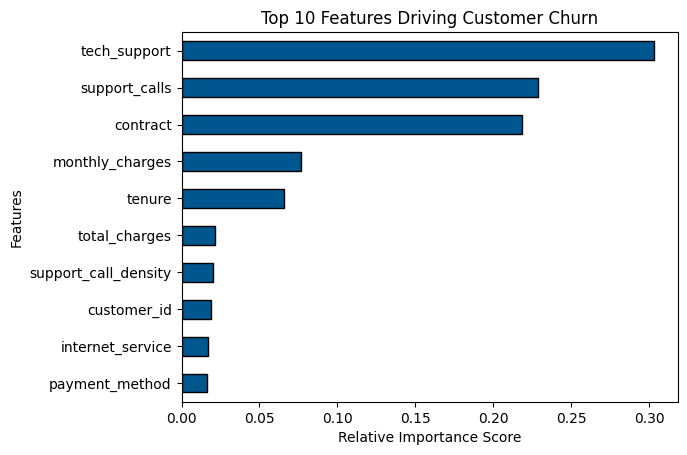

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 1. Create a Series with feature names as the index
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Ocean Blue is a clear, professional and accessible bar chart colour
chart_colour = '#00568F'

feat_importances.nlargest(10).sort_values().plot(kind='barh', color=chart_colour, edgecolor='black')

plt.title('Top 10 Features Driving Customer Churn')
plt.xlabel('Relative Importance Score')
plt.ylabel('Features')
plt.show()

#### **FEATURE CORRELATIONS**

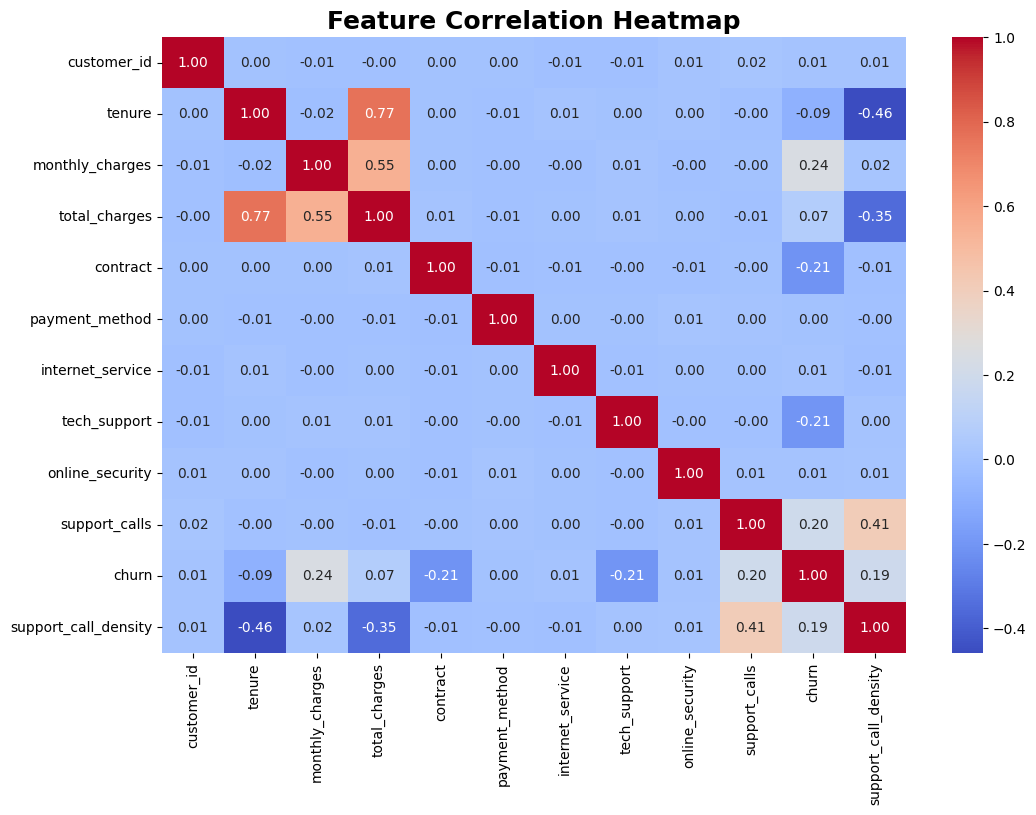

In [21]:
import seaborn as sns

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize = 18, fontweight="bold")
plt.show()

## **MODEL INSIGHTS**

- It is imperative to offer premier, industry-leading customer service and support systems to augment the retention of customers.
  
- Understandably, those on month-to-month contracts pose a high risk of churn, whereas yearly contracted customers are "locked in" to the service.

- The cost basis of any service will affect consumer behaviour, as consumer's perceived value primarily revolves around the price they pay for it.

- Short tenures possess higher risk of churn levels, which dissipates after lenghtier tenures - consumer loyalty gradually develops and strengthens. 